### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix


### Loading the dataset

In [2]:
# data collection and processing
#loaing the dataset to pandas dataframe
loan_dataset=pd.read_csv('dataset1.csv')
type(loan_dataset)

pandas.core.frame.DataFrame

In [3]:
#printint the first five rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_dataset.shape

(614, 13)

In [5]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Handlling the Missing Values

In [6]:
#number of the missiing values
loan_dataset.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#drop the missing values from 
loan_dataset=loan_dataset.dropna()

In [8]:

loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Handling Categorical Coloumns

In [9]:
# label encoding 
#loan_dataset.replace({"Loan_status":{"N":0 , "Y" :1}},inplace= True)
loan_dataset["Loan_Status"].replace({"N": 0, "Y": 1}, inplace=True)

In [10]:
loan_dataset.head(90)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,1
110,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,1
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
116,LP001404,Female,Yes,0,Graduate,No,3167,2283.0,154.0,360.0,1.0,Semiurban,1


In [11]:
#depedendt coloumn values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [12]:
#replacing the value of 3+ value with 4
loan_dataset["Dependents"].replace({"3+":4},inplace=True)

In [13]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [14]:
loan_dataset["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [15]:
#convert the categorical columns to numerical values
loan_dataset.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},"Self_Employed":{"No":0,"Yes":1},
                      "Property_Area":{"Rural":0,"Semiurban":1,"Urban":2},"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)


In [16]:
loan_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
10,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1


### DataVisulization

<Axes: xlabel='Dependents', ylabel='count'>

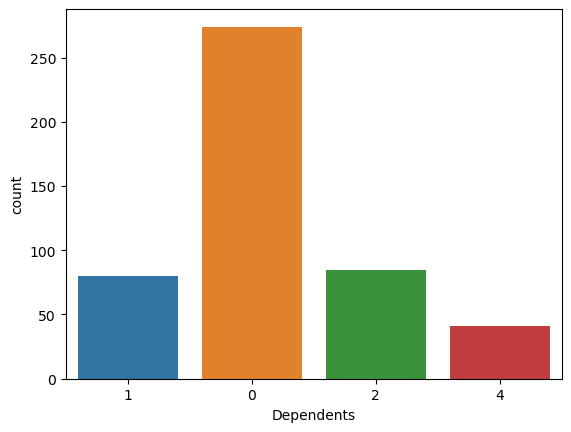

In [61]:
sns.countplot(x=loan_dataset["Dependents"])


Education
1    383
0     97
Name: count, dtype: int64


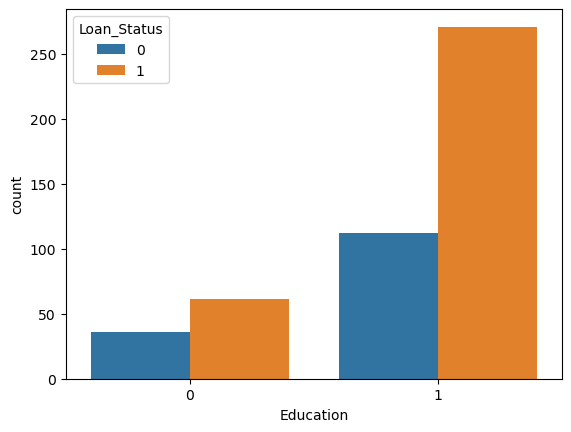

In [60]:
#Data Visulization of the data
#education and loan status
sns.countplot(x="Education",hue="Loan_Status",data=loan_dataset)
print(loan_dataset['Education'].value_counts())


Married
1    311
0    169
Name: count, dtype: int64


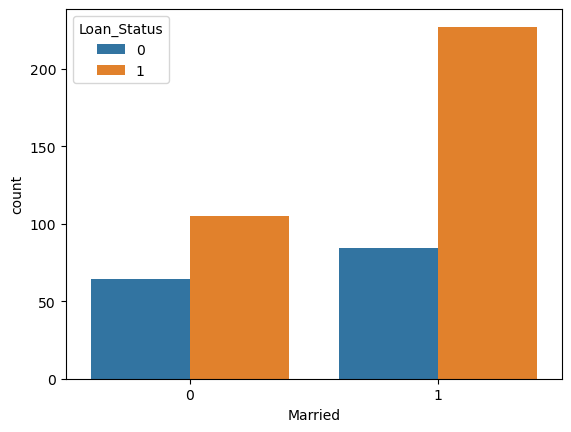

In [62]:
#marital status & loan status
sns.countplot(x='Married',hue="Loan_Status",data=loan_dataset)
print(loan_dataset['Married'].value_counts())

Who took the loan by gender:
Gender
1    394
0     86
Name: count, dtype: int64


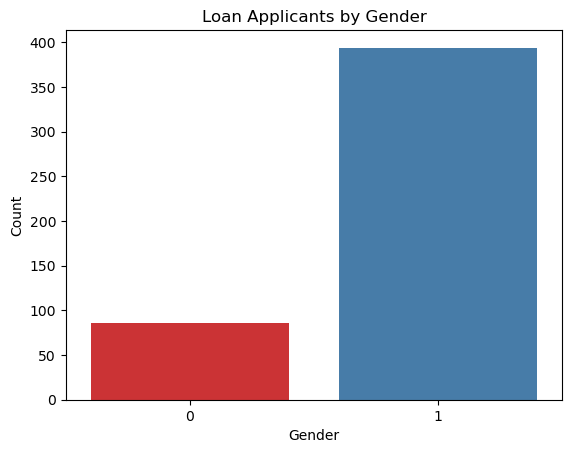

In [63]:
print("Who took the loan by gender:")
print(loan_dataset['Gender'].value_counts())
sns.countplot(x='Gender', data=loan_dataset, palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Applicants by Gender')
plt.show()


Gender
1    394
0     86
Name: count, dtype: int64


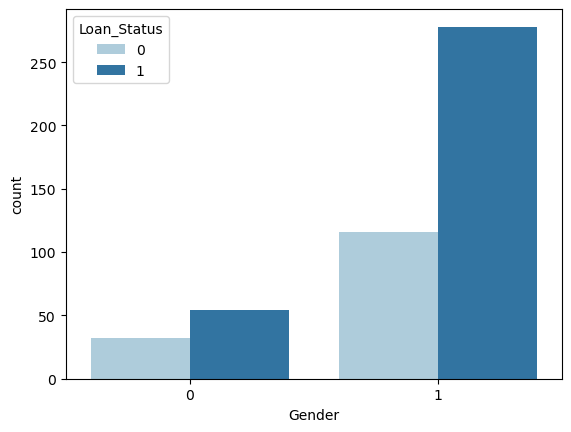

In [64]:
#marital status & loan status
sns.countplot(x='Gender',hue="Loan_Status",data=loan_dataset,palette="Paired")
print(loan_dataset['Gender'].value_counts())

number of people who take loan as group by loanamount:
LoanAmount
120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: count, Length: 186, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

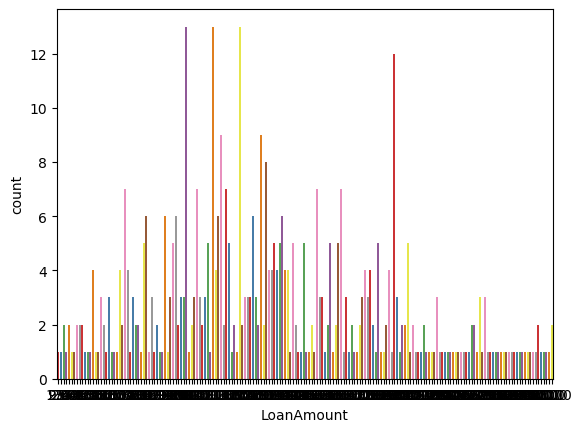

In [21]:
print("number of people who take loan as group by loanamount:")
print(loan_dataset["LoanAmount"].value_counts())
sns.countplot(x="LoanAmount",data=loan_dataset,palette="Set1")

number of people who take loan as group by Credit History:
Credit_History
1.0    410
0.0     70
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

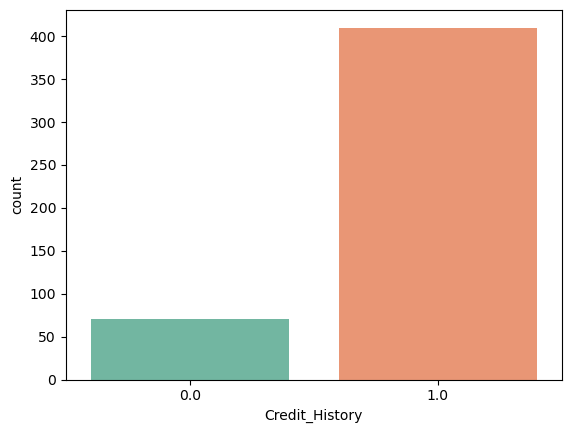

In [22]:
print("number of people who take loan as group by Credit History:")
print(loan_dataset["Credit_History"].value_counts())
sns.countplot(x="Credit_History",data=loan_dataset,palette="Set2")

In [23]:
# seperating the data and label
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset["Loan_Status"]


In [24]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [25]:
corr=X.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.349424,0.209408,-0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204
Married,0.349424,1.000000,0.359132,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653
Dependents,0.209408,0.359132,1.000000,-0.031106,0.034973,0.142074,-0.004606,0.170318,-0.095554,-0.036777,-0.020823
Education,-0.059245,-0.001652,-0.031106,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.055005
Self_Employed,-0.002761,0.015674,0.034973,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797
ApplicantIncome,0.032644,0.036717,0.142074,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160
CoapplicantIncome,0.156171,0.102950,-0.004606,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540
LoanAmount,0.098975,0.183442,0.170318,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685
Loan_Amount_Term,-0.088704,-0.107504,-0.095554,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656
Credit_History,0.022447,0.029095,-0.036777,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013


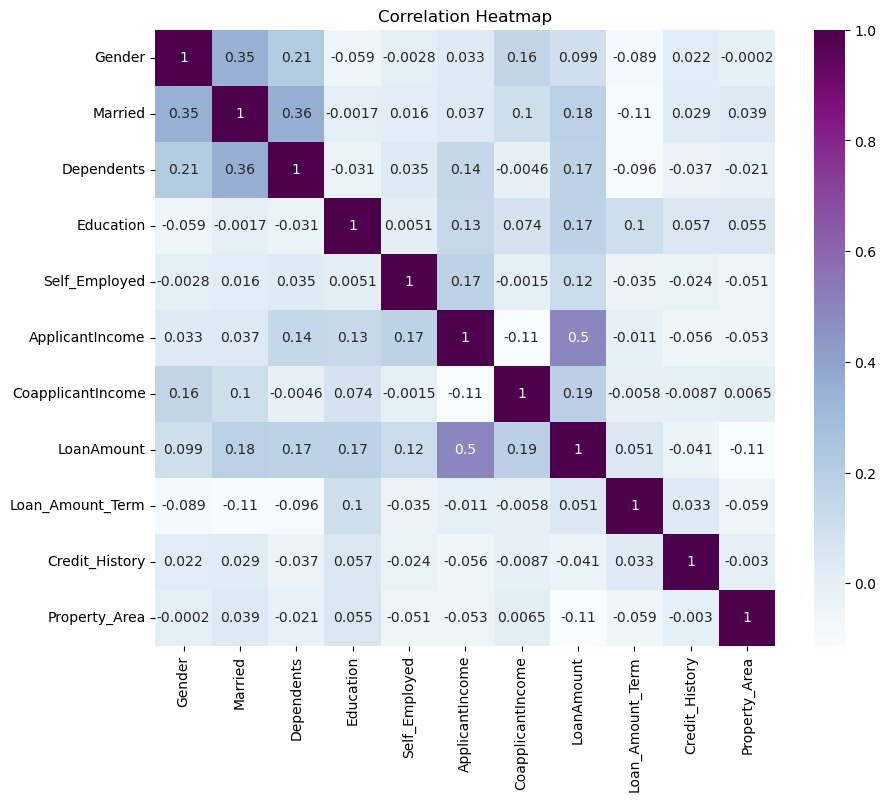

In [26]:

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu")
plt.title('Correlation Heatmap')
plt.show()


### Splitting the dataset into the training and testing sets

In [27]:
#training and testing partition
#X reperesents the data Y represents the labels
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier


In [30]:
ran_classifier=RandomForestClassifier()

In [31]:
ran_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [32]:
ran_pred=ran_classifier.predict(X_test)

In [33]:
# Compute accuracy
accuracy = accuracy_score(Y_test, ran_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8125


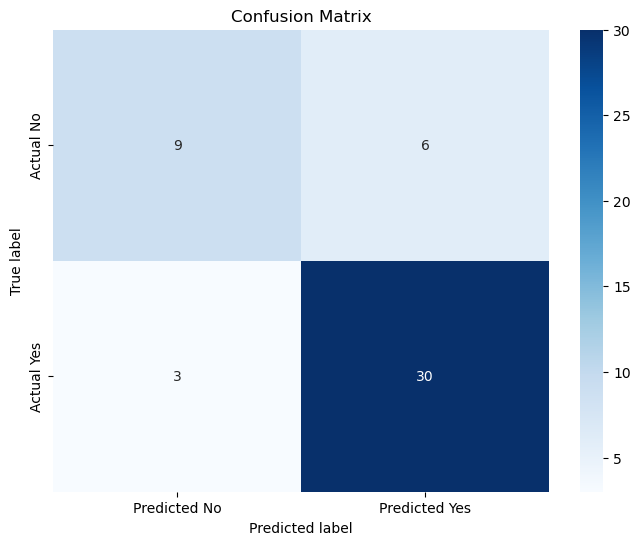

In [34]:
conf_matrix = confusion_matrix(Y_test, ran_pred)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [35]:

#making the predictions
inputs=(1,1,0,1,0,4333,2451.0,110.0,360.0,1.0,2)

#change input data into numpy array and reshape
input_as_np_array =np.array(inputs).reshape(1,-1)
prediction=ran_classifier.predict(input_as_np_array)
print(prediction)

if(prediction[0] ==0):
    print("This prerson should not get a loan")
else:
    print("This is the person is qualified for a loan")

[1]
This is the person is qualified for a loan


C:\Users\admin\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Navie Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB


In [37]:
# Create a Gaussian Naive Bayes classifier instance
naive_bayes = GaussianNB()


In [38]:
naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [39]:
# Make predictions on the test data
naive_Y_pred = naive_bayes.predict(X_test)


In [40]:
accuracy = accuracy_score(Y_test,naive_Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8333333333333334


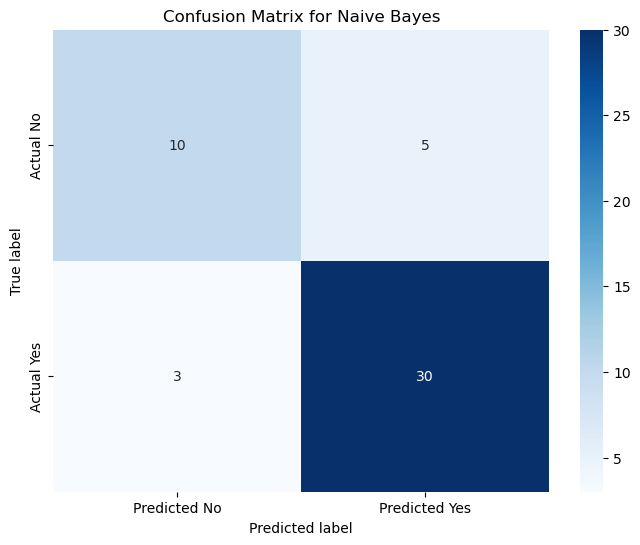

In [41]:
conf_matrix_naive = confusion_matrix(Y_test, naive_Y_pred)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_naive, annot=True, cmap="Blues", fmt="d", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [42]:

#making the predictions
inputs=(1,1,3,1,0,4000,7750.0,290.0,360.0,1.0,1)

#change input data into numpy array and reshape
input_as_np_array =np.array(inputs).reshape(1,-1)
prediction=ran_classifier.predict(input_as_np_array)
print(prediction)

if(prediction[0] ==0):
    print("This prerson should not get a loan")
else:
    print("This is the person is qualified for a loan")

[1]
This is the person is qualified for a loan


C:\Users\admin\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier


In [44]:
# Create a Decision Tree Classifier instance
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, Y_train)


DecisionTreeClassifier()

In [45]:
# Make predictions on the test data
decision_Y_pred = classifier.predict(X_test)

In [46]:
accuracy = accuracy_score(Y_test, decision_Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7291666666666666


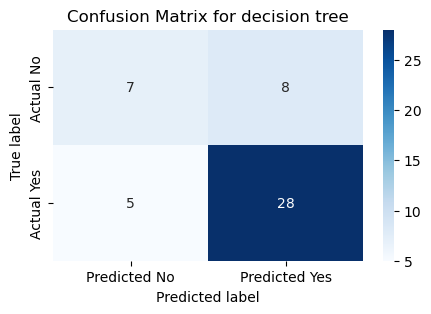

In [71]:
conf_matrix_decision = confusion_matrix(Y_test, decision_Y_pred)
# Plot confusion matrix as heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_decision, annot=True, cmap="Blues", fmt="d", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for decision tree')
plt.show()

In [48]:

#making the predictions
inputs=(1,1,3,1,0,4000,7750.0,290.0,360.0,1.0,1)

#change input data into numpy array and reshape
input_as_np_array =np.array(inputs).reshape(1,-1)
prediction=ran_classifier.predict(input_as_np_array)
print(prediction)

if(prediction[0] ==0):
    print("This prerson should not get a loan")
else:
    print("This is the person is qualified for a loan")

[1]
This is the person is qualified for a loan


C:\Users\admin\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Saving the Model 


In [49]:
import joblib

In [50]:
# Save the trained model to a file
joblib.dump(ran_classifier, 'random_forest_classifier_model.joblib')

# Load the saved model from the file
loaded_model = joblib.load('random_forest_classifier_model.joblib')

# Create a DataFrame for the unknown instance
df = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [2],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [18],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [45],
    'Loan_Amount_Term': [180],
    'Credit_History': [0],
    'Property_Area': [1]
})



In [51]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,18,0.0,45,180,0,1


In [52]:
# Use the loaded model to make predictions
prediction2 = loaded_model.predict(df)

print("Prediction:", prediction2)

Prediction: [0]



### Classification Report

In [53]:
from sklearn.metrics import classification_report

# Generate classification report for Random Forest
rf_report = classification_report(Y_test, ran_pred, output_dict=True)
rf_data = {'Accuracy': rf_report['accuracy'],
           'F1 Score': rf_report['weighted avg']['f1-score'],
           'Recall': rf_report['weighted avg']['recall'],
           'Precision': rf_report['weighted avg']['precision'],
           'Support': rf_report['weighted avg']['support']}

# Generate classification report for Naive Bayes
nb_report = classification_report(Y_test, naive_Y_pred, output_dict=True)
nb_data = {'Accuracy': nb_report['accuracy'],
           'F1 Score': nb_report['weighted avg']['f1-score'],
           'Recall': nb_report['weighted avg']['recall'],
           'Precision': nb_report['weighted avg']['precision'],
           'Support': nb_report['weighted avg']['support']}

# Generate classification report for Decision Tree
dt_report = classification_report(Y_test, decision_Y_pred, output_dict=True)
dt_data = {'Accuracy': dt_report['accuracy'],
           'F1 Score': dt_report['weighted avg']['f1-score'],
           'Recall': dt_report['weighted avg']['recall'],
           'Precision': dt_report['weighted avg']['precision'],
           'Support': dt_report['weighted avg']['support']}

# Create DataFrame
df = pd.DataFrame({'Random Forest': rf_data,
                   'Naive Bayes': nb_data,
                   'Decision Tree': dt_data}).T

# Print the DataFrame
print(df)


               Accuracy  F1 Score    Recall  Precision  Support
Random Forest  0.812500  0.806159  0.812500   0.807292     48.0
Naive Bayes    0.833333  0.829832  0.833333   0.829670     48.0
Decision Tree  0.729167  0.720008  0.729167   0.717014     48.0


In [54]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Load the saved Random Forest model
rf_model = joblib.load('random_forest_classifier_model.joblib')

# Function to handle prediction
def predict_loan_approval():
    try:
        # Get user input from entry widgets
        gender = int(gender_entry.get())
        married = int(married_entry.get())
        dependents = int(dependents_entry.get())
        education = int(education_entry.get())
        self_employed = int(self_employed_entry.get())
        applicant_income = float(applicant_income_entry.get())
        coapplicant_income = float(coapplicant_income_entry.get())
        loan_amount = float(loan_amount_entry.get())
        loan_amount_term = float(loan_amount_term_entry.get())
        credit_history = float(credit_history_entry.get())
        property_area = int(property_area_entry.get())

        # Make prediction using the model
        prediction = rf_model.predict([[gender, married, dependents, education, self_employed,
                                         applicant_income, coapplicant_income, loan_amount,
                                         loan_amount_term, credit_history, property_area]])
        
        # Display prediction
        messagebox.showinfo("Loan Approval Prediction", f"The predicted loan approval status is: {'Yes' if prediction[0] == 1 else 'No'}")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Create GUI window
root = tk.Tk()
root.title("Loan Approval Prediction")

# Create entry widgets and labels
tk.Label(root, text="Gender (0 or 1):").grid(row=0, column=0)
gender_entry = tk.Entry(root)
gender_entry.grid(row=0, column=1)

tk.Label(root, text="Married (0 or 1):").grid(row=1, column=0)
married_entry = tk.Entry(root)
married_entry.grid(row=1, column=1)

# Add more entry widgets and labels for other features...

# Button for prediction
predict_button = tk.Button(root, text="Predict Loan Approval", command=predict_loan_approval)
predict_button.grid(row=11, column=0, columnspan=2)

# Run the GUI
root.mainloop()


In [55]:
from tkinter import *
import joblib
import pandas as pd

In [68]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('random_forest_classifier_model.joblib')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
    
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education").grid(row=4)
Label(master,text = "Self_Employed").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()

In [72]:
from tkinter import *
import joblib
import pandas as pd

def show_entry():
    # Retrieve input values from entry widgets
    try:
        p1 = float(entries[0].get())
        p2 = float(entries[1].get())
        p3 = float(entries[2].get())
        p4 = float(entries[3].get())
        p5 = float(entries[4].get())
        p6 = float(entries[5].get())
        p7 = float(entries[6].get())
        p8 = float(entries[7].get())
        p9 = float(entries[8].get())
        p10 = float(entries[9].get())
        p11 = float(entries[10].get())
        
        # Load the model
        model = joblib.load('random_forest_classifier_model.joblib')
        
        # Create a DataFrame with user inputs
        df = pd.DataFrame({
            'Gender': [p1],
            'Married': [p2],
            'Dependents': [p3],
            'Education': [p4],
            'Self_Employed': [p5],
            'ApplicantIncome': [p6],
            'CoapplicantIncome': [p7],
            'LoanAmount': [p8],
            'Loan_Amount_Term': [p9],
            'Credit_History': [p10],
            'Property_Area': [p11]
        })
        
        # Make prediction
        result = model.predict(df)
        
        # Display prediction result
        if result == 1:
            Label(master, text="Loan approved").grid(row=13, columnspan=2)
        else:
            Label(master, text="Loan Not Approved").grid(row=13, columnspan=2)
    
    except ValueError:
        # Handle invalid input values
        Label(master, text="Please enter valid numerical values").grid(row=13, columnspan=2)

master = Tk()
master.title("Loan Status Prediction Using Machine Learning")

Label(master, text="Loan Status Prediction", bg="black", fg="white").grid(row=0, columnspan=2)

labels = ["Gender [1:Male, 0:Female]", "Married [1:Yes, 0:No]", "Dependents [1, 2, 3, 4]", "Education", 
          "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", 
          "Credit_History", "Property_Area"]

# Create entry widgets
entries = []
for i, label in enumerate(labels):
    Label(master, text=label).grid(row=i+1, column=0)
    entry = Entry(master)
    entry.grid(row=i+1, column=1)
    entries.append(entry)

Button(master, text="Predict", command=show_entry).grid(row=12, columnspan=2)

mainloop()


##### 